In [2]:
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



In [403]:
import csv

with open('results/labels_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predClasses_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predEntropy_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)
    

In [327]:
import csv

with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)

In [386]:
def exitAccuracy(results, labels, classes=[]):
    """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
    """    
    print(len(classes))
    classAcc = {}
    correct =[]
    count = []
    percentage = []
    if len(classes) > 0:
        for i, labelClass in enumerate(classes):            
            correct.append(results[np.where(labels==labelClass)].sum())
            count.append(len(labels[np.where(labels == labelClass)]))
            percentage.append(results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)]))
            classAcc[labelClass] = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
    else: 
        print(results.sum())
        print((len(labels)))
        classAcc["all"] = results.sum()/len(labels)
    avgAcc = results.sum()/len(labels)
    
        
#     print(correct)
#     print(count)
#     print(percentage)

    return avgAcc, classAcc


In [397]:
def findMainExitAccuracies(pred, labels, num_outputs, labelClasses=[], output_names=[],graph=True):
        """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
        """
        results = np.equal(pred, labels)
        pred = np.array(pred)
        print(pred.dtype)
        labels = np.array(labels)
        
        transpose_results = np.transpose(results) #truths
        transpose_preds = np.transpose(pred) #per exit rather then per input
        transpose_labels = np.transpose(labels)
        # %matplotlib inline
        if graph==True:
            plt.style.use('seaborn-whitegrid')
            fig = plt.figure()
            fig.tight_layout()
        df =  pd.DataFrame() 
        avgAcc, classAcc= exitAccuracy(transpose_results[0],transpose_labels[0],labelClasses)
        print(avgAcc)
        fig, ax = plt.subplots()
        ticks = []
        if graph==True:
            for i, x in enumerate(classAcc):
                ticks.append(x)
                print(x)                
                plt.bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
                if type(x) != str:
                    plt.text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
                else: 
                    plt.text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, avgAcc, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                plt.hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Accuracy", linestyles="dashed", alpha=0.5)
                plt.text(len(classAcc.keys())-.5, .74, ' Avg Acc%', ha='left', va='center')
            
    #     print(sum(classAcc.values())/len(classAcc.values()))
        if graph==True:
            plt.xticks(ticks)
            plt.title("Class Label Accuracy")
            plt.ylabel("Accuracy %")
            plt.xlabel("Label Class #")
            plt.show()
        return classAcc

float64
0
747
1000
0.747
all


<Figure size 432x288 with 0 Axes>

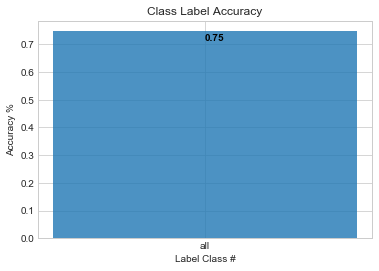

In [398]:
y = findMainExitAccuracies(pred, labels, 4,[], ["dense5","pooling_3","pooling_4","dense_3"])

float64
10
0.747
0
1
2
3
4
5
6
7
8
9


<Figure size 432x288 with 0 Axes>

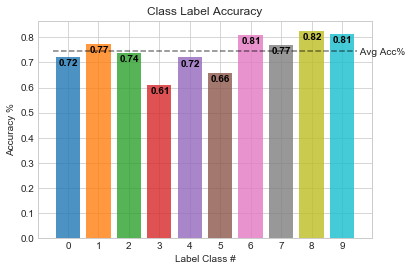

In [399]:
y = findMainExitAccuracies(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])

In [400]:

def graphclassAccuracy(pred, labels, num_outputs, classes, output_names=[],graph=True):
    """ finds the class accuracies of the main exit and the branches.
    """
       
        
#           print(sum(classAcc.values())/len(classAcc.values()))
   
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    if graph==True:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
        ticks = []
        series=[]
    df =  pd.DataFrame() 
    returnData = []
    print("label classes{}".format(labelClasses))
    for i in range(num_outputs):
        print("output: {}".format(i))

        avgAcc, classAcc= exitAccuracy(transpose_results[i],transpose_labels[i],labelClasses)
        if graph==True:
            for j, x in enumerate(classAcc):
                ticks.append(x)
#                 print(classAcc[x])       
                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
                axs[round(int(i/2)), round(i%2)].bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
#                 if type(x) != str:
#                     axs[round(int(i/2)), round(i%2)].text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 else: 
#                     axs[round(int(i/2)), round(i%2)].text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, .74, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                axs[round(int(i/2)), round(i%2)].hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Avg Acc", linestyles="dashed", alpha=0.5)
#                 axs[round(int(i/2)), round(i%2)].text(len(classAcc.keys())-.5, .74, ' Avg Acc', ha='left', va='center')
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
    #     print(sum(classAcc.values())/len(classAcc.values()))
            
    if graph==True:        
        lines = []
        labels = []
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Label Class #', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')

        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
        plt.setp(axs, xticks=ticks, xticklabels=ticks)
#         plt.xticks(ticks)
        plt.show()
#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

label classes[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output: 0
10
output: 1
10
output: 2
10
output: 3
10


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

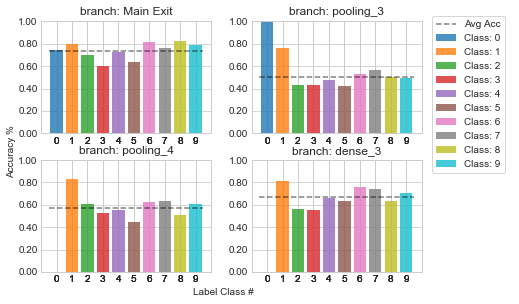

In [404]:
y = graphclassAccuracy(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","pooling_3","pooling_4","dense_3"])

In [ ]:
#### something is clearly werid with the 0 class. I need to figure out what is happening.